In [140]:
# importing all the libraries
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
import numpy as np
from gensim.models import KeyedVectors
from sklearn import model_selection
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from gensim.summarization import summarize
from gensim.summarization import keywords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer # caring to care
from nltk.corpus import stopwords
from string import punctuation

#from scipy.misc import imresize (did not run)
from PIL import Image

from collections import Counter
from sklearn.metrics import confusion_matrix

# Word2Vec related libraries


#Importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from joblib import dump,load

import re
# reading the training dataset into the variable train_dataset
train_dataset = pd.read_csv('/content/training_variants')
#reading the test dataset  into variable  test_dataset
test_dataset = pd.read_csv('/content/test_variants')
print(test_dataset.head())# print the first five rows of test dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
   ID     Gene Variation
0   0    ACSL4     R570S
1   1    NAGLU     P521L
2   2      PAH     L333F
3   3     ING1     A148D
4   4  TMEM216      G77A


In [141]:
#Reading the training_text dataset and printing the dimension values.
text_file  =pd.read_csv("/content/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print("No of rows : ", text_file.shape[0])
print("No of Features : ", text_file.shape[1])
print("Feature_names : ", text_file.columns.values)
text_file.head()

No of rows :  3321
No of Features :  2
Feature_names :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [142]:


# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


In [143]:

def nlp_preprocessing(text, index, column):
    if type(text) is not int:
        string = ""
        # replace every special char with space
        text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
        # replace multiple spaces with single space
        text = re.sub('\s+',' ', text)
        # converting all the chars into lower-case.
        text = text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        text_file[column][index] = string

In [144]:
#Grouping the train dataset by genes
dataset_group = train_dataset.groupby(by="Gene")
dataset_group.count()

train_dataset

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
...,...,...,...,...
3316,3316,RUNX1,D171N,4
3317,3317,RUNX1,A122*,1
3318,3318,RUNX1,Fusions,1
3319,3319,RUNX1,R80C,4


In [145]:
#merging the train_dataset and text_file on ID Column to final_dataset
final_dataset = pd.merge(train_dataset, text_file,on='ID', how='left')
final_dataset.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [146]:
final_dataset.Variation = final_dataset.Variation.str.replace(' ','_')

In [147]:
# grouping the train_dataset by Variation column and storing it in dataset_group_v
final_dataset.Variation 

dataset_group_v = train_dataset.groupby(by="Variation")
dataset_group_v.count()

,ID,Gene,Class
Variation,,,
1_2009trunc,1,1,1
2010_2471trunc,1,1,1
256_286trunc,1,1,1
3' Deletion,1,1,1
385_418del,1,1,1
...,...,...,...
YAP1-FAM118B Fusion,1,1,1
YAP1-MAMLD1 Fusion,1,1,1
ZC3H7B-BCOR Fusion,1,1,1


In [148]:
final_dataset.loc[final_dataset['TEXT'].isnull(),'TEXT'] = final_dataset['Gene'] +' '+final_dataset['Variation']


final_dataset.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


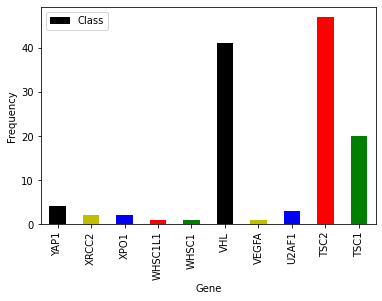

In [149]:
df_gene_plot = dataset_group.count().sort_values(by='Gene',ascending=False).head(10).plot(kind='bar',color = ['k', 'y', 'b', 'r', 'g'], y ='Class', ylabel = 'Frequency',stacked = True)

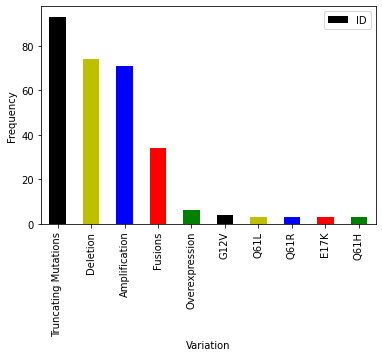

In [150]:
#plotting of gene frequency in train_dataset
df_gene_plot = dataset_group_v.count().sort_values(by='ID',ascending=False).head(10).plot(kind='bar',color = ['k', 'y', 'b', 'r', 'g'], y ='ID', ylabel = 'Frequency')

In [151]:
dataset_genes = final_dataset['Gene'].value_counts()
print('Number of Unique Genes :', dataset_genes.shape[0])
# the top 10 genes that occured
print(dataset_genes.head(10))

Number of Unique Genes : 264
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64


In [152]:
dataset_genes.shape

(264,)

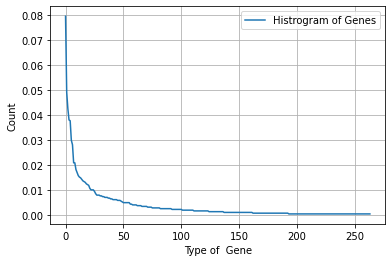

In [153]:
total_sum = sum(dataset_genes.values);
preciselog = dataset_genes.values/total_sum;
plt.plot(preciselog, label="Histrogram of Genes")
plt.xlabel('Type of  Gene')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

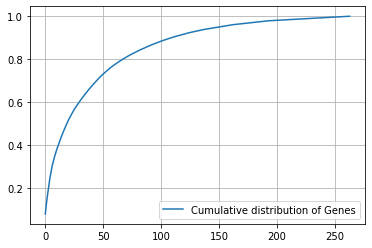

In [154]:
cumulative_sum = np.cumsum(preciselog)
plt.plot(cumulative_sum,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

In [155]:
dataset_variations = final_dataset['Variation'].value_counts()
print('Unique Variations Count:::::', dataset_variations.shape[0])
# the top 10 variations that occured most
print(dataset_variations.head(10))

Unique Variations Count::::: 2996
Truncating_Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
Q61L                     3
E17K                     3
Q61R                     3
T58I                     3
Name: Variation, dtype: int64


In [156]:
print(final_dataset.head())
print(final_dataset.shape)
print(final_dataset.shape)
#checking if the final_datset contains any null values and storing it in train_m.
train_m = final_dataset.isnull().sum()
print(train_m)
#checking if the test_dataset contains any null values and storing it in test_m.
test_m = test_dataset.isnull().sum()
print(test_m)
#removing if any null null values are there in any row in final_dataset
train_data = final_dataset.dropna(axis = 0, how = "any")
test_data = final_dataset.dropna(axis = 0, how = "any")

   ID    Gene  ... Class                                               TEXT
0   0  FAM58A  ...     1  Cyclin-dependent kinases (CDKs) regulate a var...
1   1     CBL  ...     2   Abstract Background  Non-small cell lung canc...
2   2     CBL  ...     2   Abstract Background  Non-small cell lung canc...
3   3     CBL  ...     3  Recent evidence has demonstrated that acquired...
4   4     CBL  ...     4  Oncogenic mutations in the monomeric Casitas B...

[5 rows x 5 columns]
(3321, 5)
(3321, 5)
ID           0
Gene         0
Variation    0
Class        0
TEXT         0
dtype: int64
ID           0
Gene         0
Variation    0
dtype: int64


In [157]:
print(train_data)

        ID    Gene  ... Class                                               TEXT
0        0  FAM58A  ...     1  Cyclin-dependent kinases (CDKs) regulate a var...
1        1     CBL  ...     2   Abstract Background  Non-small cell lung canc...
2        2     CBL  ...     2   Abstract Background  Non-small cell lung canc...
3        3     CBL  ...     3  Recent evidence has demonstrated that acquired...
4        4     CBL  ...     4  Oncogenic mutations in the monomeric Casitas B...
...    ...     ...  ...   ...                                                ...
3316  3316   RUNX1  ...     4  Introduction  Myelodysplastic syndromes (MDS) ...
3317  3317   RUNX1  ...     1  Introduction  Myelodysplastic syndromes (MDS) ...
3318  3318   RUNX1  ...     1  The Runt-related transcription factor 1 gene (...
3319  3319   RUNX1  ...     4  The RUNX1/AML1 gene is the most frequent targe...
3320  3320   RUNX1  ...     4  The most frequent mutations associated with le...

[3321 rows x 5 columns]


In [158]:
print(test_data)

        ID    Gene  ... Class                                               TEXT
0        0  FAM58A  ...     1  Cyclin-dependent kinases (CDKs) regulate a var...
1        1     CBL  ...     2   Abstract Background  Non-small cell lung canc...
2        2     CBL  ...     2   Abstract Background  Non-small cell lung canc...
3        3     CBL  ...     3  Recent evidence has demonstrated that acquired...
4        4     CBL  ...     4  Oncogenic mutations in the monomeric Casitas B...
...    ...     ...  ...   ...                                                ...
3316  3316   RUNX1  ...     4  Introduction  Myelodysplastic syndromes (MDS) ...
3317  3317   RUNX1  ...     1  Introduction  Myelodysplastic syndromes (MDS) ...
3318  3318   RUNX1  ...     1  The Runt-related transcription factor 1 gene (...
3319  3319   RUNX1  ...     4  The RUNX1/AML1 gene is the most frequent targe...
3320  3320   RUNX1  ...     4  The most frequent mutations associated with le...

[3321 rows x 5 columns]


In [159]:
#printing all the unique classes in the train_data
train_data["Class"].unique()


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [160]:
#printing all the unique genes in train_data
train_data["Gene"].unique()


array(['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB',
       'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP',
       'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', 'SF3B1',
       'LATS2', 'EGFR', 'NKX2-1', 'EIF1AX', 'ARID2', 'BRD4', 'HIST1H1C',
       'ERRFI1', 'CHEK2', 'PAK1', 'TMPRSS2', 'H3F3A', 'ELF3', 'ROS1',
       'ASXL2', 'CDH1', 'EPCAM', 'EP300', 'EPAS1', 'TP53', 'TP53BP1',
       'SMAD2', 'SMAD3', 'SMAD4', 'CDK4', 'AURKB', 'CDK6', 'FBXW7',
       'CDK8', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'ASXL1',
       'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'BRIP1', 'ERCC3', 'ERCC4',
       'ABL1', 'CEBPA', 'ERG', 'HLA-A', 'HLA-B', 'PDGFRA', 'PDGFRB',
       'RBM10', 'KDM5C', 'ESR1', 'ETV1', 'ETV6', 'TSC1', 'IKZF1', 'TSC2',
       'EWSR1', 'ACVR1', 'FOXA1', 'MDM2', 'ARID1A', 'EZH2', 'MDM4',
       'KLF4', 'RXRA', 'MAP3K1', 'AXIN1', 'BAP1', 'MEN1', 'FANCA',
       'FANCC', 'MET', 'U2AF1', 'KMT2C', 'FAT1', 'ARID1B', 'PIK3CA',
       'PIK3CB', 'PIM1

In [161]:
#all the unique variations in train_data
train_data["Variation"].unique()


array(['Truncating_Mutations', 'W802*', 'Q249E', ..., 'A122*', 'R80C',
       'K83E'], dtype=object)

In [162]:
#count of all the unique variations in train_data
train_data["Variation"].value_counts()

Truncating_Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
C238S                    1
L1951R                   1
P691S                    1
V356R                    1
R306S                    1
Name: Variation, Length: 2996, dtype: int64

GENE

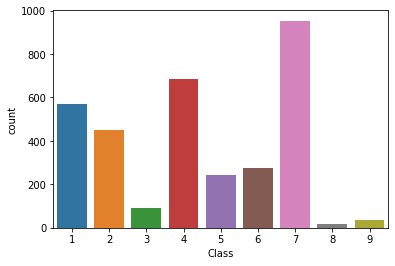

In [163]:
sns.countplot(x = train_data["Class"])
plt.show()

In [164]:
#printing the count of each gene in each class 
train_data.groupby(["Gene"])["Class"].value_counts()

Gene   Class
ABL1   2        24
       7         2
ACVR1  7         2
       2         1
AGO2   1         4
                ..
XPO1   2         1
       6         1
XRCC2  1         2
YAP1   2         3
       7         1
Name: Class, Length: 590, dtype: int64

There are 264 different categories of genes in the train data, and they are distibuted as follows

In [165]:
#printing the count of variation of each class.
train_data.groupby(["Variation"])["Class"].value_counts()

Variation            Class
1_2009trunc          1        1
2010_2471trunc       2        1
256_286trunc         7        1
3'_Deletion          4        1
385_418del           4        1
                             ..
YAP1-FAM118B_Fusion  2        1
YAP1-MAMLD1_Fusion   2        1
ZC3H7B-BCOR_Fusion   8        1
ZNF198-FGFR1_Fusion  7        1
p61BRAF              7        1
Name: Class, Length: 3032, dtype: int64

In [166]:
str_data = train_data.select_dtypes(include = ["object"])

VARIATION


In [167]:
my_data = train_data.select_dtypes(include = ["object"])
my_data_type = test_data.select_dtypes(include = ["object"])
my_integerdata = train_data.select_dtypes(include = ["integer", "float"])
my_integerdata_test = test_data.select_dtypes(include = ["integer", "float"])

There are 2996 different categories of variations in the train data, and they are distibuted as follows

In [168]:
#encoding all the columns into numbers using label encoding.
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
feature = my_data.apply(label.fit_transform)
feature = feature.join(my_integerdata)
feature.head()

,Gene,Variation,TEXT,ID,Class
0,85,2629,510,0,1
1,39,2856,88,1,2
2,39,1897,88,2,2
3,39,1667,1293,3,3
4,39,1447,1158,4,4


In [169]:
y_train = feature["Class"]
y_train.head()
x_train = feature.drop(["Class", "ID"] ,axis = 1)
print(x_train.head())


   Gene  Variation  TEXT
0    85       2629   510
1    39       2856    88
2    39       1897    88
3    39       1667  1293
4    39       1447  1158


In [170]:
#splitting the model into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


In [171]:
#printing the  first five rows of x_train
print(x_train.head())


      Gene  Variation  TEXT
2401   162       1975   192
2088     2        149   363
1686    98        149   214
53     199       1674  1667
1283   114       1931   422


In [172]:
print(y_train.head())

2401    4
2088    2
1686    7
53      1
1283    2
Name: Class, dtype: int64


In [173]:
print(train_data)


        ID    Gene  ... Class                                               TEXT
0        0  FAM58A  ...     1  Cyclin-dependent kinases (CDKs) regulate a var...
1        1     CBL  ...     2   Abstract Background  Non-small cell lung canc...
2        2     CBL  ...     2   Abstract Background  Non-small cell lung canc...
3        3     CBL  ...     3  Recent evidence has demonstrated that acquired...
4        4     CBL  ...     4  Oncogenic mutations in the monomeric Casitas B...
...    ...     ...  ...   ...                                                ...
3316  3316   RUNX1  ...     4  Introduction  Myelodysplastic syndromes (MDS) ...
3317  3317   RUNX1  ...     1  Introduction  Myelodysplastic syndromes (MDS) ...
3318  3318   RUNX1  ...     1  The Runt-related transcription factor 1 gene (...
3319  3319   RUNX1  ...     4  The RUNX1/AML1 gene is the most frequent targe...
3320  3320   RUNX1  ...     4  The most frequent mutations associated with le...

[3321 rows x 5 columns]


In [174]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [175]:
#LGBM Classifier
import lightgbm
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(random_state=0)
model_lgb = model_lgb.fit(x_train, y_train)

y_predicted_lgb = model_lgb.predict(x_test)  #prediction of validation data


In [176]:
#calculating the Precision , Recall and F1 Score
confusion = confusion_matrix(y_test, y_predicted_lgb)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_lgb)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lgb, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lgb, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_lgb, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lgb, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lgb, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_lgb, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lgb, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lgb, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_lgb, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report lightgbm\n')
print(classification_report(y_test, y_predicted_lgb, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 65   1   0  21   6   4   6   0   0]
 [  2  36   1   4   1   1  47   0   0]
 [  1   0   4   8   3   0   8   0   0]
 [ 25   4   3  98   3   2   9   0   0]
 [ 10   5   1   7  23   2  12   0   0]
 [  5   4   0   5   2  27   8   0   0]
 [  6  25   2   4   3   3 140   0   0]
 [  0   1   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   1   1   4]]

Accuracy: 0.60

Micro Precision: 0.60
Micro Recall: 0.60
Micro F1-score: 0.60

Macro Precision: 0.60
Macro Recall: 0.52
Macro F1-score: 0.55

Weighted Precision: 0.59
Weighted Recall: 0.60
Weighted F1-score: 0.59

Classification Report lightgbm

              precision    recall  f1-score   support

     Class 1       0.57      0.63      0.60       103
     Class 2       0.47      0.39      0.43        92
     Class 3       0.36      0.17      0.23        24
     Class 4       0.67      0.68      0.67       144
     Class 5       0.56      0.38      0.46        60
     Class 6       0.69      0.53      0.60        51
    

In [177]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000,max_depth=23,min_samples_split=10, random_state=10)

classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [178]:



#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report Random Forest\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 55   1   0  29   5   1  12   0   0]
 [  6  25   0   4   0   0  57   0   0]
 [  1   0   0   8   2   1  12   0   0]
 [ 18   5   0  94   2   3  22   0   0]
 [  9   6   0   7  19   4  15   0   0]
 [  9   3   0   3   3  21  12   0   0]
 [  7  15   1   9   0   2 149   0   0]
 [  0   1   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0   1   1   3]]

Accuracy: 0.55

Micro Precision: 0.55
Micro Recall: 0.55
Micro F1-score: 0.55

Macro Precision: 0.49
Macro Recall: 0.39
Macro F1-score: 0.41

Weighted Precision: 0.53
Weighted Recall: 0.55
Weighted F1-score: 0.52

Classification Report Random Forest

              precision    recall  f1-score   support

     Class 1       0.52      0.53      0.53       103
     Class 2       0.45      0.27      0.34        92
     Class 3       0.00      0.00      0.00        24
     Class 4       0.61      0.65      0.63       144
     Class 5       0.61      0.32      0.42        60
     Class 6       0.66      0.41      0.51        51

In [179]:
# XGBClassifier

In [180]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

# fit model no training data
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
# make predictions for test data
y_pred_xgb = model_xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.04%


In [181]:
# Performance Evaluation of XGB

In [182]:



#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_xgb)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_xgb, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_xgb, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_xgb, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_xgb, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_xgb, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_xgb, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_xgb, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_xgb, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_xgb, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report XGBClassifier\n')
print(classification_report(y_test, y_pred_xgb, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 48   2   0  30   7   2  14   0   0]
 [  0  16   0   9   0   0  67   0   0]
 [  1   0   2   8   2   1  10   0   0]
 [ 20   0   0  94   2   2  26   0   0]
 [  5   0   0   8  19   5  23   0   0]
 [  2   0   0   7   4  19  19   0   0]
 [  5   3   2  11   0   1 161   0   0]
 [  0   1   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0   1   1   3]]

Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.56
Macro Recall: 0.38
Macro F1-score: 0.41

Weighted Precision: 0.58
Weighted Recall: 0.54
Weighted F1-score: 0.51

Classification Report XGBClassifier

              precision    recall  f1-score   support

     Class 1       0.59      0.47      0.52       103
     Class 2       0.73      0.17      0.28        92
     Class 3       0.50      0.08      0.14        24
     Class 4       0.56      0.65      0.60       144
     Class 5       0.56      0.32      0.40        60
     Class 6       0.63      0.37      0.47        51

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000, random_state=22)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=32)))]
clf = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
from sklearn.model_selection import train_test_split

clf.fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred_ensemble = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [184]:



#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_xgb)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_xgb, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_xgb, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_xgb, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_xgb, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_xgb, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_xgb, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_xgb, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_xgb, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_xgb, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_xgb, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 48   2   0  30   7   2  14   0   0]
 [  0  16   0   9   0   0  67   0   0]
 [  1   0   2   8   2   1  10   0   0]
 [ 20   0   0  94   2   2  26   0   0]
 [  5   0   0   8  19   5  23   0   0]
 [  2   0   0   7   4  19  19   0   0]
 [  5   3   2  11   0   1 161   0   0]
 [  0   1   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0   1   1   3]]

Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.56
Macro Recall: 0.38
Macro F1-score: 0.41

Weighted Precision: 0.58
Weighted Recall: 0.54
Weighted F1-score: 0.51

Classification Report

              precision    recall  f1-score   support

     Class 1       0.59      0.47      0.52       103
     Class 2       0.73      0.17      0.28        92
     Class 3       0.50      0.08      0.14        24
     Class 4       0.56      0.65      0.60       144
     Class 5       0.56      0.32      0.40        60
     Class 6       0.63      0.37      0.47        51
     Class 7 

In [185]:
#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt = model_dt.fit(x_train, y_train)

y_predicted_dt = model_dt.predict(x_test)  #prediction of validation data

In [186]:
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted_dt)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_dt)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_dt, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_dt, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_dt, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_dt, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_dt, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_dt, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_dt, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_dt, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_dt, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report DecisionTreeClassifier\n')
print(classification_report(y_test, y_predicted_dt, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[49  3  1 27  6  6  8  1  2]
 [ 5 44  1  3  4  4 31  0  0]
 [ 3  2  2  7  3  0  7  0  0]
 [22  5  4 89  7  8  8  1  0]
 [14  4  3  7 23  4  4  0  1]
 [ 8  6  2  4  0 25  6  0  0]
 [12 47  4 11  8  5 95  0  1]
 [ 0  1  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  1  1  3]]

Accuracy: 0.50

Micro Precision: 0.50
Micro Recall: 0.50
Micro F1-score: 0.50

Macro Precision: 0.42
Macro Recall: 0.45
Macro F1-score: 0.43

Weighted Precision: 0.50
Weighted Recall: 0.50
Weighted F1-score: 0.50

Classification Report DecisionTreeClassifier

              precision    recall  f1-score   support

     Class 1       0.43      0.48      0.45       103
     Class 2       0.39      0.48      0.43        92
     Class 3       0.12      0.08      0.10        24
     Class 4       0.60      0.62      0.61       144
     Class 5       0.45      0.38      0.41        60
     Class 6       0.48      0.49      0.49        51
     Class 7       0.59      0.52      0.55       183
     Class 8     

In [187]:
#Naive Bayes 
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb = model_nb.fit(x_train, y_train)

y_predicted_nb = model_nb.predict(x_test)  #prediction of validation data

In [188]:
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted_nb)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_nb)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_nb, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_nb, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_nb, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_nb, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_nb, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_nb, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_nb, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_nb, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_nb, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report GaussianNB\n')
print(classification_report(y_test, y_predicted_nb, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[  6   0   0  50   0   0  47   0   0]
 [  2   0   0  20   0   0  70   0   0]
 [  0   0   0   7   0   0  17   0   0]
 [  1   0   0  68   0   0  75   0   0]
 [  0   0   0  10   0   0  50   0   0]
 [  1   0   0   6   0   0  44   0   0]
 [  4   0   0  19   0   0 160   0   0]
 [  0   0   0   1   0   0   1   0   0]
 [  0   0   0   3   0   0   3   0   0]]

Accuracy: 0.35

Micro Precision: 0.35
Micro Recall: 0.35
Micro F1-score: 0.35

Macro Precision: 0.13
Macro Recall: 0.16
Macro F1-score: 0.11

Weighted Precision: 0.24
Weighted Recall: 0.35
Weighted F1-score: 0.24

Classification Report GaussianNB

              precision    recall  f1-score   support

     Class 1       0.43      0.06      0.10       103
     Class 2       0.00      0.00      0.00        92
     Class 3       0.00      0.00      0.00        24
     Class 4       0.37      0.47      0.41       144
     Class 5       0.00      0.00      0.00        60
     Class 6       0.00      0.00      0.00        51
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetr

In [189]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn = model_knn.fit(x_train, y_train)

y_predicted_knn = model_knn.predict(x_test)  #prediction of validation data

In [190]:
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted_knn)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_knn)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_knn, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_knn, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_knn, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_knn, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_knn, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_knn, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_knn, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_knn, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_knn, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report KNeighborsClassifier\n')
print(classification_report(y_test, y_predicted_knn, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[63  6  0 20  1  5  8  0  0]
 [23 24  1  9  1  4 30  0  0]
 [ 2  3  2  9  0  2  6  0  0]
 [39 23  3 56  1  6 16  0  0]
 [18  9  1  4 13  5 10  0  0]
 [11  5  1  4  2 17 11  0  0]
 [34 41  6 12  6  5 79  0  0]
 [ 0  1  0  0  0  0  1  0  0]
 [ 1  0  0  2  0  0  1  1  1]]

Accuracy: 0.38

Micro Precision: 0.38
Micro Recall: 0.38
Micro F1-score: 0.38

Macro Precision: 0.40
Macro Recall: 0.28
Macro F1-score: 0.29

Weighted Precision: 0.41
Weighted Recall: 0.38
Weighted F1-score: 0.38

Classification Report KNeighborsClassifier

              precision    recall  f1-score   support

     Class 1       0.33      0.61      0.43       103
     Class 2       0.21      0.26      0.24        92
     Class 3       0.14      0.08      0.11        24
     Class 4       0.48      0.39      0.43       144
     Class 5       0.54      0.22      0.31        60
     Class 6       0.39      0.33      0.36        51
     Class 7       0.49      0.43      0.46       183
     Class 8       

In [191]:
from sklearn.svm import SVC
model_svm = SVC(random_state = 1 )
model_svm = model_svm.fit( x_train , y_train )

y_predicted_svm = model_svm.predict( x_test ) #prediction of validation data


In [192]:
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#importing confusion matrix for 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted_svm)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_svm)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_svm, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_svm, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_svm, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_svm, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_svm, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_svm, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_svm, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_svm, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_svm, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report SVM\n')
print(classification_report(y_test, y_predicted_svm, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 31   0   0  31   0   0  41   0   0]
 [  8   0   0  14   0   0  70   0   0]
 [  2   0   0   7   0   0  15   0   0]
 [ 23   0   0  50   0   0  71   0   0]
 [  7   0   0  11   0   0  42   0   0]
 [  7   0   0   5   0   0  39   0   0]
 [  7   0   0  16   0   0 160   0   0]
 [  0   0   0   1   0   0   1   0   0]
 [  0   0   0   3   0   0   3   0   0]]

Accuracy: 0.36

Micro Precision: 0.36
Micro Recall: 0.36
Micro F1-score: 0.36

Macro Precision: 0.12
Macro Recall: 0.17
Macro F1-score: 0.13

Weighted Precision: 0.23
Weighted Recall: 0.36
Weighted F1-score: 0.27

Classification Report SVM

              precision    recall  f1-score   support

     Class 1       0.36      0.30      0.33       103
     Class 2       0.00      0.00      0.00        92
     Class 3       0.00      0.00      0.00        24
     Class 4       0.36      0.35      0.35       144
     Class 5       0.00      0.00      0.00        60
     Class 6       0.00      0.00      0.00        51
     Clas

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetr

In [193]:

confusion = confusion_matrix(y_test, y_predicted_lgb)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_lgb)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lgb, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lgb, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_lgb, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lgb, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lgb, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_lgb, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lgb, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lgb, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_lgb, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report lightgbm\n')
print(classification_report(y_test, y_predicted_lgb, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 65   1   0  21   6   4   6   0   0]
 [  2  36   1   4   1   1  47   0   0]
 [  1   0   4   8   3   0   8   0   0]
 [ 25   4   3  98   3   2   9   0   0]
 [ 10   5   1   7  23   2  12   0   0]
 [  5   4   0   5   2  27   8   0   0]
 [  6  25   2   4   3   3 140   0   0]
 [  0   1   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   1   1   4]]

Accuracy: 0.60

Micro Precision: 0.60
Micro Recall: 0.60
Micro F1-score: 0.60

Macro Precision: 0.60
Macro Recall: 0.52
Macro F1-score: 0.55

Weighted Precision: 0.59
Weighted Recall: 0.60
Weighted F1-score: 0.59

Classification Report lightgbm

              precision    recall  f1-score   support

     Class 1       0.57      0.63      0.60       103
     Class 2       0.47      0.39      0.43        92
     Class 3       0.36      0.17      0.23        24
     Class 4       0.67      0.68      0.67       144
     Class 5       0.56      0.38      0.46        60
     Class 6       0.69      0.53      0.60        51
    

In [194]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(random_state=1)
model_gbc = model_gbc.fit(x_train, y_train)

y_predicted_gbc = model_gbc.predict(x_test)  #prediction of validation data

In [195]:

confusion = confusion_matrix(y_test, y_predicted_gbc)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_gbc)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_gbc, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_gbc, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_gbc, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_gbc, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_gbc, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_gbc, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_gbc, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_gbc, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_gbc, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report GradientBoostingClassifier\n')
print(classification_report(y_test, y_predicted_gbc, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[ 58   1   0  25   8   2   8   1   0]
 [  0  25   0   9   0   1  56   1   0]
 [  1   0   3   7   3   0  10   0   0]
 [ 19   2   1 101   1   3  17   0   0]
 [  7   0   1   7  26   0  19   0   0]
 [  7   0   1   3   3  22  15   0   0]
 [  5   9   3  10   3   2 148   1   2]
 [  0   1   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   1   0   5]]

Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.53
Macro Recall: 0.46
Macro F1-score: 0.47

Weighted Precision: 0.59
Weighted Recall: 0.58
Weighted F1-score: 0.56

Classification Report GradientBoostingClassifier

              precision    recall  f1-score   support

     Class 1       0.60      0.56      0.58       103
     Class 2       0.66      0.27      0.38        92
     Class 3       0.33      0.12      0.18        24
     Class 4       0.62      0.70      0.66       144
     Class 5       0.59      0.43      0.50        60
     Class 6       0.73      0.43      0

In [196]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [197]:
y_predicted_lr= logisticRegr.predict(x_test) 

In [198]:

confusion = confusion_matrix(y_test, y_predicted_lr)
print('Confusion Matrix\n')
print(confusion)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted_lr)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lr, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lr, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_lr, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lr, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lr, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted_lr, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted_lr, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted_lr, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted_lr, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report Logistic Regression\n')
print(classification_report(y_test, y_predicted_lr, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']))



Confusion Matrix

[[  4   0   0  54   0   0  45   0   0]
 [  2   0   0  21   0   0  69   0   0]
 [  0   0   0   9   0   0  15   0   0]
 [  3   0   0  68   0   0  73   0   0]
 [  0   0   0   9   0   0  51   0   0]
 [  2   0   0   6   0   0  43   0   0]
 [  5   0   0  25   0   0 153   0   0]
 [  0   0   0   1   0   0   1   0   0]
 [  0   0   0   3   0   0   3   0   0]]

Accuracy: 0.34

Micro Precision: 0.34
Micro Recall: 0.34
Micro F1-score: 0.34

Macro Precision: 0.10
Macro Recall: 0.15
Macro F1-score: 0.11

Weighted Precision: 0.21
Weighted Recall: 0.34
Weighted F1-score: 0.23

Classification Report Logistic Regression

              precision    recall  f1-score   support

     Class 1       0.25      0.04      0.07       103
     Class 2       0.00      0.00      0.00        92
     Class 3       0.00      0.00      0.00        24
     Class 4       0.35      0.47      0.40       144
     Class 5       0.00      0.00      0.00        60
     Class 6       0.00      0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetr